## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [77]:
x = np.linspace(0,20)

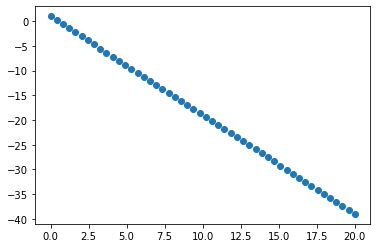

In [78]:
y = -2*x+1
plt.scatter(x,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [79]:
# th0=0; th1=0; lr=0.001; m=x.size; n = 120
def batchGD(x,y,lr,n):
    th0=0; th1=0; m=x.size; j=[]
    all_th0 = []
    all_th1 = []
    all_h = []
    for i in range(n):
        h = th0 + th1*x
        dj0 = (h-y).sum()/m
        dj1 = ((h-y)*x).sum()/m
        th0 -= lr*dj0
        th1 -= lr*dj1
        all_th0.append(th0)
        all_th1.append(th1)
        all_h.append(h)
        j.append(1/2/m*((h-y)**2).sum())
        if j[-1] == 0.1:
            break
    return all_th0, all_th1, j, all_h, th0, th1

#### Try your function with any input parameterss of your choice.

In [80]:
all_th0, all_th1, j, all_h, th0, th1 = batchGD(x,y,0.001,40)

#### Calculate r2 score

In [81]:
R2 = r2(y,all_h[-1])
print(R2)

0.9975831083900923


#### Plot loss vs. epochs

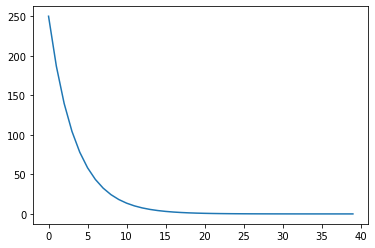

In [82]:
plt.plot(j)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

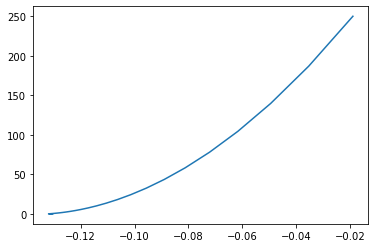

In [83]:
plt.plot(all_th0,j)

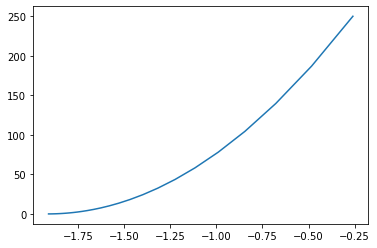

In [84]:
plt.plot(all_th1,j)

#### Plot all regression lines till converge

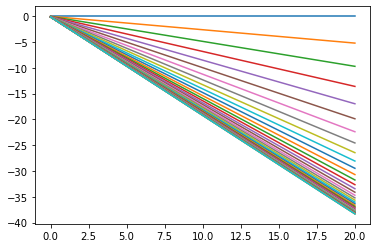

In [85]:
for i in all_h:
    plt.plot(x,i)

#### Plot the best regression line

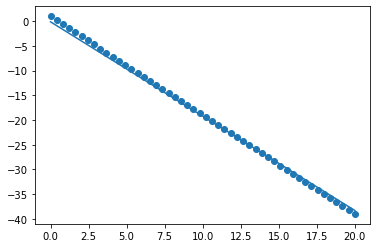

In [86]:
plt.scatter(x,y)
plt.plot(x,all_h[-1])

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [87]:
all_th0, all_th1, j, all_h, th0, th1 = batchGD(x,y,0.004,10)

In [88]:
R2 = r2(y,all_h[-1])
print("r2= ",R2)

r2=  0.9976189088562512


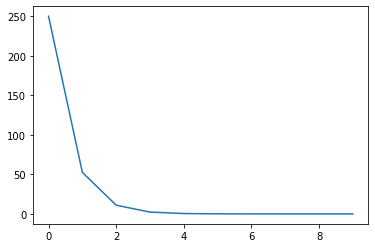

In [89]:
plt.plot(j)

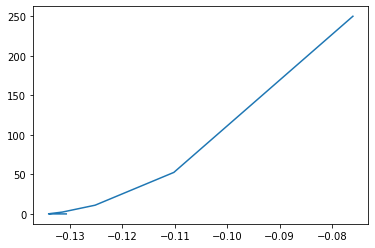

In [90]:
plt.plot(all_th0,j)

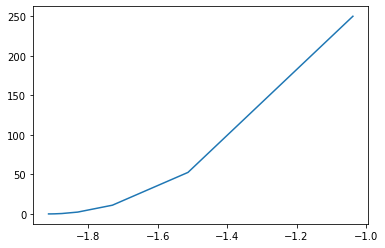

In [91]:
plt.plot(all_th1,j)

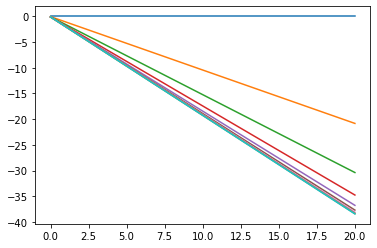

In [92]:
for i in all_h:
    plt.plot(x,i)

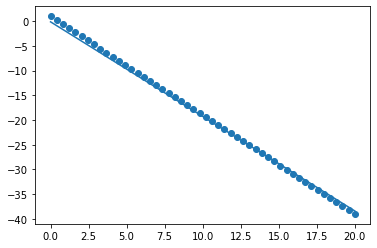

In [93]:
plt.scatter(x,y)
plt.plot(x,all_h[-1])

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [94]:
def mini_batch(x,y,lr,n,bs=1):
    
    def getbatch(a, bs, bi):
        bt = []
        l = len(a)
        start = (bi*bs)%l
        for i in range(bs):
            bt += [a[(start+i)%l]]
        return np.array(bt)

    th0=0; th1=0; m=x.size; j=[]
    all_th0 = []
    all_th1 = []
    all_h = []
    for i in range(n):
        xi = getbatch(x,bs,i)
        yi = getbatch(y,bs,i)
        hi = th0 + th1*xi
        dj0 = (hi-yi).sum()/bs
        dj1 = ((hi-yi)*xi).sum()/bs
        th0 -= lr*dj0
        th1 -= lr*dj1
        j.append(1/2/bs*((hi-yi)**2).sum())
        h = th0+th1*x
        all_th0.append(th0)
        all_th1.append(th1)
        all_h.append(h)
        norm = (dj0**2+dj1**2)**0.5
        if j[-1] == 0.1 or norm == 0.1:
            break
    return all_th0, all_th1, j, all_h, th0, th1


In [95]:
all_th0, all_th1, j, all_h, th0, th1 = mini_batch(x,y,0.01,20,8)

In [96]:
R2 = r2(y,all_h[-1])
print(R2)

0.9966438086893261


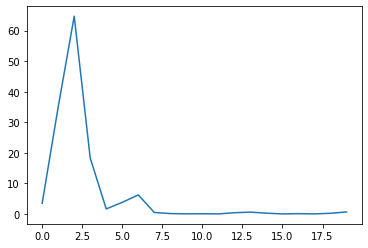

In [97]:
plt.plot(j)

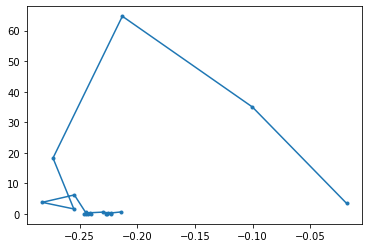

In [107]:
plt.plot(all_th0,j,'.-')

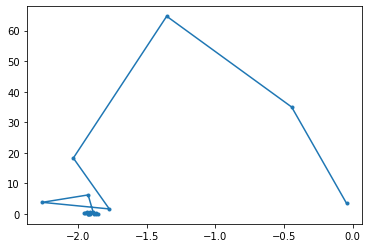

In [105]:
plt.plot(all_th1,j,'.-')

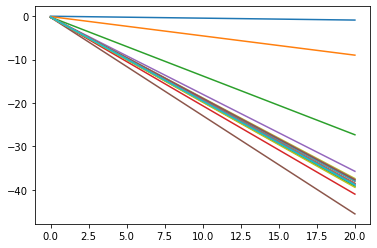

In [106]:
for i in all_h:
    plt.plot(x,i)

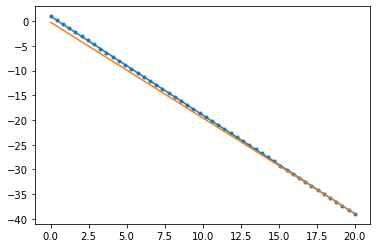

In [104]:
plt.plot(x,y,'.-')
plt.plot(x,all_h[-1])

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [45]:
def stoc(x,y,lr,n):
    return mini_batch(x,y,lr,n)

In [60]:
all_th0, all_th1, j, all_h, th0, th1 = stoc(x,y,0.001,200)

In [61]:
R2 = r2(y,all_h[-1])
print(R2)

0.9966632450974277


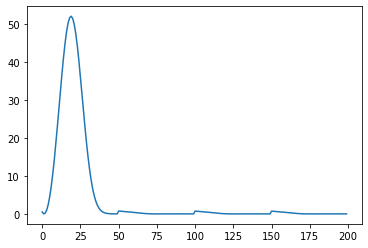

In [62]:
plt.plot(j)

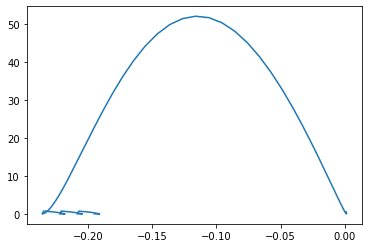

In [63]:
plt.plot(all_th0,j)

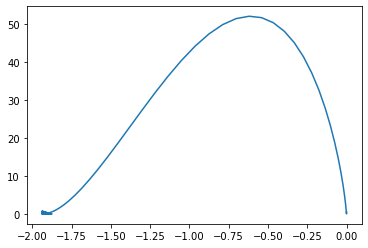

In [64]:
plt.plot(all_th1,j)

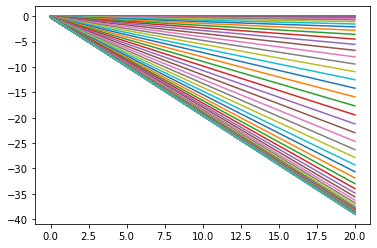

In [65]:
for i in all_h:
    plt.plot(x,i)

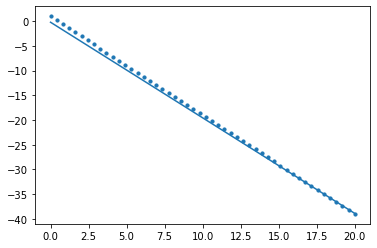

In [109]:
plt.scatter(x,y,s=10)
plt.plot(x,all_h[-1])